# Bayes Decision

1. เขียนโปรแกรมสำหรับสร้างตัวจำแนกแบบเบส์สำหรับการแจกแจงปรกติตัวแปรเดียว กรณีที่ความแปรปรวนของทั้งสองคลาสเท่ากัน


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# ฟังก์ชันสำหรับคำนวณ Likelihood
def likelihood(x, mean, std_dev):
    coeff = 1.0 / (np.sqrt(2 * np.pi) * std_dev)
    exponent = np.exp(-((x - mean) ** 2) / (2 * std_dev ** 2))
    return coeff * exponent

# ฟังก์ชันสำหรับคำนวณ Posterior โดยถือว่า Prior เท่ากัน (0.5)
def posterior(x, mean0, mean1, std_dev):
    likelihood0 = likelihood(x, mean0, std_dev)
    likelihood1 = likelihood(x, mean1, std_dev)
    return likelihood0 / (likelihood0 + likelihood1), likelihood1 / (likelihood0 + likelihood1)

# ฟังก์ชันสำหรับคำนวณขอบเขตการตัดสินใจ (Decision Boundary)
def decision_boundary(mean0, mean1, std_dev):
    return (mean0 + mean1) / 2

# สร้างกราฟสำหรับพารามิเตอร์ที่กำหนดเอง
def plot_fixed_parameters():
    mean0, mean1 = 2, 5  # ค่าเฉลี่ยของ Class 0 และ Class 1
    std_dev = 1.5  # ความแปรปรวนของทั้งสองคลาสเท่ากัน

    # กำหนดช่วงของ x สำหรับการพล็อต
    x_values = np.linspace(-2, 10, 200)
    
    # คำนวณ likelihood และ posterior
    likelihood0_values = likelihood(x_values, mean0, std_dev)
    likelihood1_values = likelihood(x_values, mean1, std_dev)
    posterior_values0, posterior_values1 = posterior(x_values, mean0, mean1, std_dev)

    # กำหนดจุดตัดสินใจ
    decision_point = decision_boundary(mean0, mean1, std_dev)

    # พล็อตกราฟ
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.plot(x_values, likelihood0_values, label='Likelihood Class 0', color='blue')
    plt.plot(x_values, likelihood1_values, label='Likelihood Class 1', color='red')
    plt.title('Likelihood')
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.plot(x_values, posterior_values0, label='Posterior', color='green')
    plt.plot(x_values, posterior_values1, label='Posterior', color='green')
    plt.title('Posterior')
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.plot(x_values, likelihood0_values, label='Likelihood Class 0', color='blue')
    plt.plot(x_values, likelihood1_values, label='Likelihood Class 1', color='red')
    plt.axvline(x=decision_point, color='black', linestyle='--', label='Decision Boundary')
    plt.title('Decision Boundary')
    plt.legend()
    plt.show()

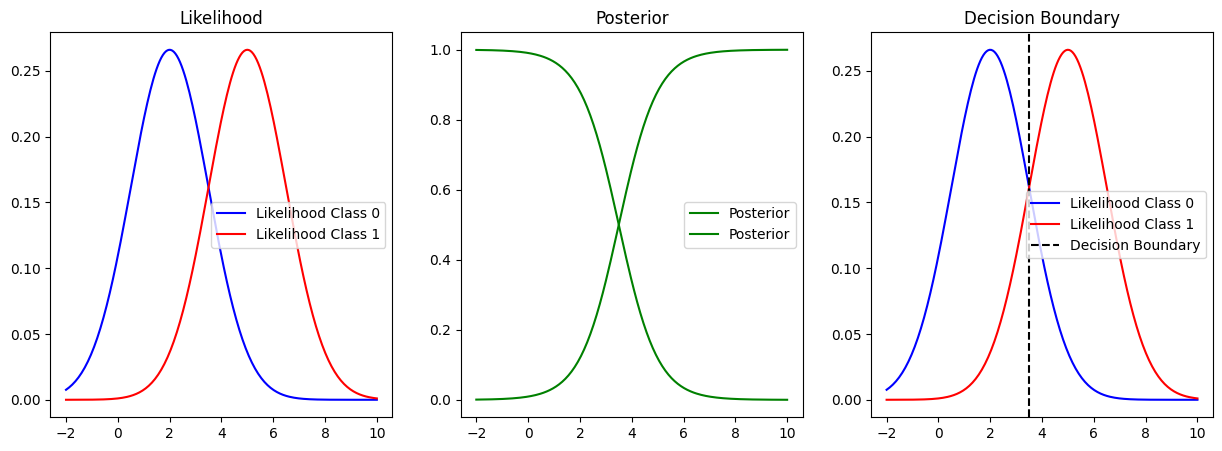

In [4]:
plot_fixed_parameters()